# **Import Libraries**

In [1]:
# Checking data
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

# Visualization
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from statsmodels.graphics.gofplots import qqplot

# Ignore Warning
import warnings

### **Set Up Libraries**

In [2]:
warnings.simplefilter('ignore')

%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)

# **Data Collection**

In [3]:
data = pd.read_csv("data_umkm_kabupaten_kota_kategori.csv") # load data

data_copy = data.copy(deep=True)

# **Data Preprocessing**

In [4]:
data # cek Keseluruhan Data

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_usaha,jumlah_umkm,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,AKSESORIS,927,UNIT,2017
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,BATIK,927,UNIT,2017
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,BORDIR,132,UNIT,2017
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,CRAFT,33111,UNIT,2017
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,FASHION,32316,UNIT,2017
...,...,...,...,...,...,...,...,...,...
1345,1346,32,JAWA BARAT,3279,KOTA BANJAR,KONVEKSI,1732,UNIT,2021
1346,1347,32,JAWA BARAT,3279,KOTA BANJAR,KULINER,12510,UNIT,2021
1347,1348,32,JAWA BARAT,3279,KOTA BANJAR,MAKANAN,9150,UNIT,2021
1348,1349,32,JAWA BARAT,3279,KOTA BANJAR,MINUMAN,1698,UNIT,2021


In [5]:
data.isnull().mean().to_frame() # cek missing data

,0
id,0.0
kode_provinsi,0.0
nama_provinsi,0.0
kode_kabupaten_kota,0.0
nama_kabupaten_kota,0.0
kategori_usaha,0.0
jumlah_umkm,0.0
satuan,0.0
tahun,0.0


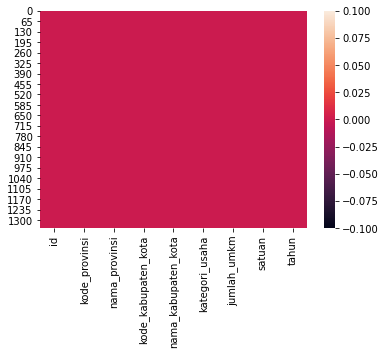

In [6]:
sns.heatmap(data.isnull())
plt.show()

In [7]:
data.dtypes.to_frame() # cek type data

,0
id,int64
kode_provinsi,int64
nama_provinsi,object
kode_kabupaten_kota,int64
nama_kabupaten_kota,object
kategori_usaha,object
jumlah_umkm,int64
satuan,object
tahun,int64


In [8]:
data.info() # getting information bout the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1350 non-null   int64 
 1   kode_provinsi        1350 non-null   int64 
 2   nama_provinsi        1350 non-null   object
 3   kode_kabupaten_kota  1350 non-null   int64 
 4   nama_kabupaten_kota  1350 non-null   object
 5   kategori_usaha       1350 non-null   object
 6   jumlah_umkm          1350 non-null   int64 
 7   satuan               1350 non-null   object
 8   tahun                1350 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 95.0+ KB


In [9]:
data.describe() # cek statistical measure

,id,kode_provinsi,kode_kabupaten_kota,jumlah_umkm,tahun
count,1350.000000,1350.0,1350.000000,1350.000000,1350.000000
mean,675.500000,32.0,3231.333333,20627.588148,2019.000000
std,389.855743,0.0,31.213414,29401.369607,1.414738
min,1.000000,32.0,3201.000000,9.000000,2017.000000
25%,338.250000,32.0,3207.000000,665.000000,2018.000000
50%,675.500000,32.0,3214.000000,10422.000000,2019.000000
75%,1012.750000,32.0,3273.000000,24765.000000,2020.000000
max,1350.000000,32.0,3279.000000,181187.000000,2021.000000


In [10]:
data.describe(include='all') # cek statistical measure

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_usaha,jumlah_umkm,satuan,tahun
count,1350.000000,1350.0,1350,1350.000000,1350,1350,1350.000000,1350,1350.000000
unique,NaN,NaN,1,NaN,27,10,NaN,1,NaN
top,NaN,NaN,JAWA BARAT,NaN,KABUPATEN CIAMIS,BORDIR,NaN,UNIT,NaN
freq,NaN,NaN,1350,NaN,50,135,NaN,1350,NaN
mean,675.500000,32.0,NaN,3231.333333,NaN,NaN,20627.588148,NaN,2019.000000
std,389.855743,0.0,NaN,31.213414,NaN,NaN,29401.369607,NaN,1.414738
min,1.000000,32.0,NaN,3201.000000,NaN,NaN,9.000000,NaN,2017.000000
25%,338.250000,32.0,NaN,3207.000000,NaN,NaN,665.000000,NaN,2018.000000
50%,675.500000,32.0,NaN,3214.000000,NaN,NaN,10422.000000,NaN,2019.000000
75%,1012.750000,32.0,NaN,3273.000000,NaN,NaN,24765.000000,NaN,2020.000000


# **Data Analysis**

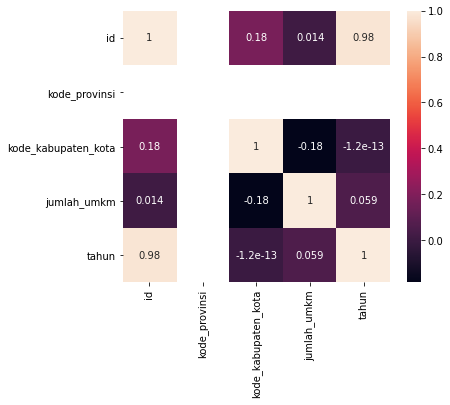

In [11]:
# correlation matrix
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

# **Univariate Analysis**

### **Apakah bentuk distribusi dari Jumlah UMKM**

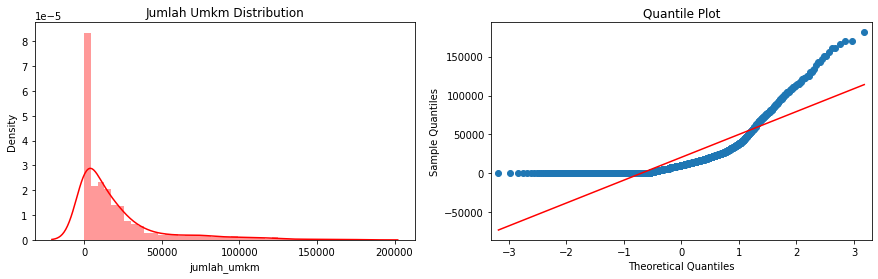

In [12]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['jumlah_umkm'], 
    ax=ax1 , 
    color ='red'
)

ax1.set(title='Jumlah Umkm Distribution')

qqplot(
    data['jumlah_umkm'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

> Bentuk distribusinya ialah **Skewed Right**.

### **Apakah bentuk distribusi dari Kode Kabupaten dan Kota**

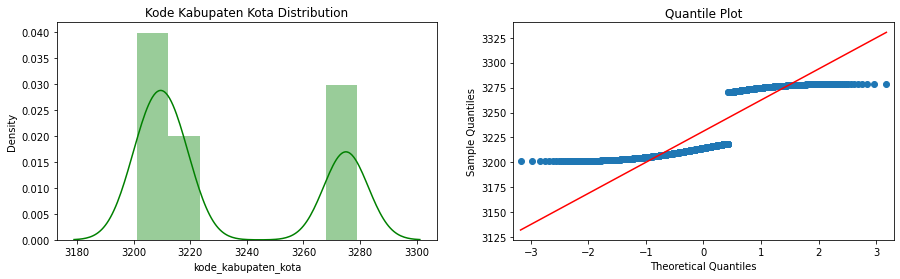

In [13]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['kode_kabupaten_kota'], 
    ax=ax1 , 
    color ='green'
)

ax1.set(title='Kode Kabupaten Kota Distribution')

qqplot(
    data['kode_kabupaten_kota'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

> Bentuk distribusinya ialah **Skewed Right**.

### **Apakah bentuk distribusi dari Kode Provinsi?**

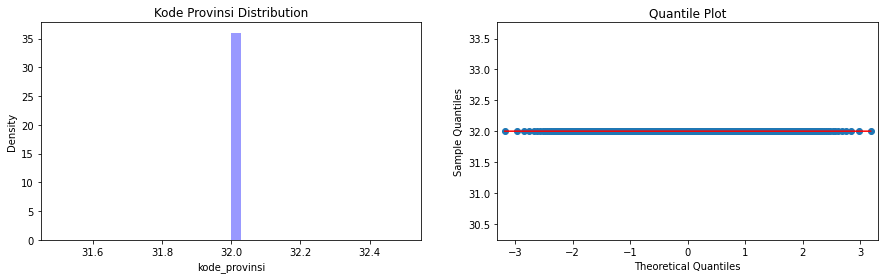

In [14]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['kode_provinsi'], 
    ax=ax1 , 
    color ='blue'
)

ax1.set(title='Kode Provinsi Distribution')

qqplot(
    data['kode_provinsi'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

> Bentuk distribusinya ialah **Normal Distribution**.

### **Apakah bentuk distribusi dari Tahun?**

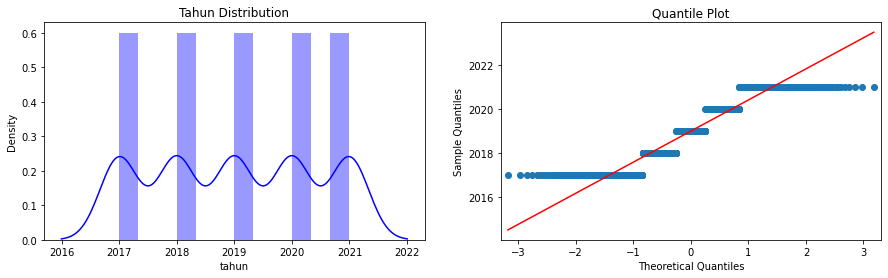

In [15]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['tahun'], 
    ax=ax1 , 
    color ='blue'
)

ax1.set(title='Tahun Distribution')

qqplot(
    data['tahun'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

> Bentuk distribusinya ialah **Normal Distribution**.

In [16]:
# checking skewness value 
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed

skew_value = data.skew().sort_values(ascending=False)
skew_value

jumlah_umkm            2.334831
kode_kabupaten_kota    0.656871
id                     0.000000
kode_provinsi          0.000000
tahun                  0.000000
dtype: float64

# **Bivariate Analysis**

### **Function**

In [17]:
def bivariate_visualization_bar(data, x, y, color):
    
    """
    Returning Bar Plot Visualization
    for bivariate analysis
    
    data = data
    x = x axis
    y = y axis
    color = color/hue
    title = 'put your title here'
    
    """
    
    fig = px.bar(
        data,
        x=x,
        y=y,
        color=color
    )
    
    return fig.show()

def bivariate_visualization_pie(data, names, title, hole, template='gridon'):
    
    """
    Returning Pie Plot Visualization
    for bivariate analysis
    
    data = data
    names = names
    hole = hole (0.5 / 0,4)
    title = 'put your title here'
    template = template (default 'gridon')
    
    """
    
    fig = px.pie(
        data,
        names=names,
        hole=hole,
        title=title,
        template=template
    )
    
    return fig.show()

def bivariate_visualization_scatter(data, y, x, color, title, template='plotly_dark', trendline='ols'):
    
    """
    Returning Scatter Visualization
    for bivariate analysis
    
    data = data
    y = y axis
    x = x axis
    color = color/hue
    template = template (default 'plotly_dark')
    trendline = trendline (default 'ols')
    
    """
    
    fig = px.scatter(
        data,
        y=y,
        x=x,
        color=color,
        title=title,
        template=template,
        trendline=trendline
    )

    return fig.show()

## **Visualization**

### **Tahun manakah yang memiliki Jumlah UMKM terbanyak?**

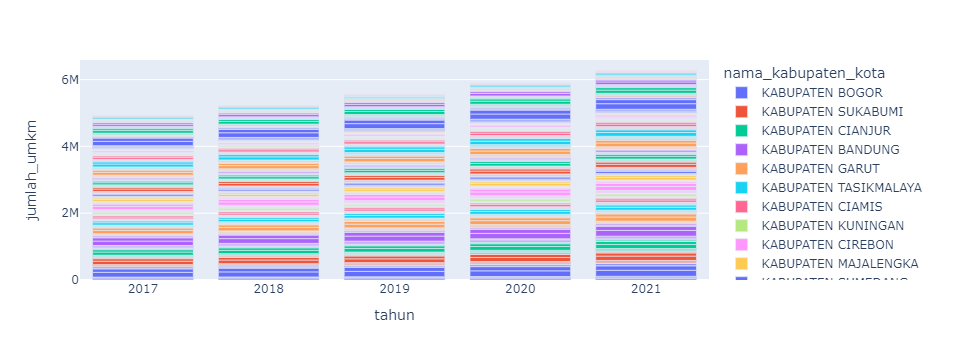

In [18]:
bivariate_visualization_bar(
    data=data,
    x=data['tahun'],
    y=data['jumlah_umkm'],
    color=data['nama_kabupaten_kota']
)

> Tahun **2021** memiliki **Jumlah UMKM** terbanyak.

### **Nama Kabupaten dan Kota manakah yang memiliki Jumlah UMKM terbanyak dalam setiap tahunnya?**

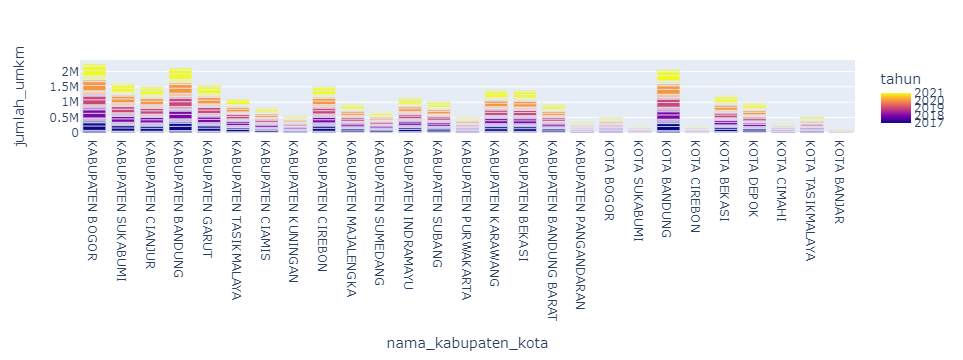

In [19]:
bivariate_visualization_bar(
    data=data,
    x=data['nama_kabupaten_kota'],
    y=data['jumlah_umkm'],
    color=data['tahun']
)

> Nama Kabupaten dan Kota yang memiliki **Jumlah UMKM** terbanyak adalah **Kota Bandung**, **Kabupaten Bogor**, dan **Kabupaten Bandung**.

### **Kategori Usaha dan Jumlah UMKM manakah yang terbanyak dari setiap Provinsi?**

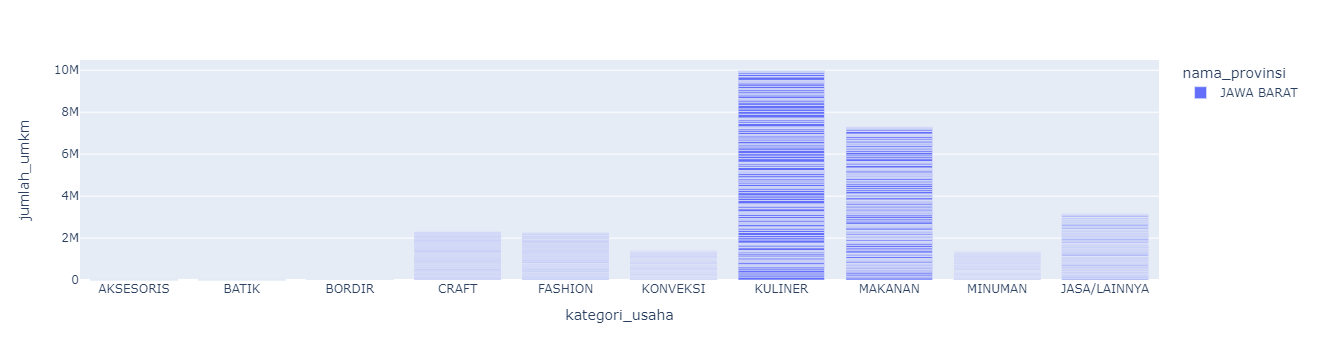

In [20]:
bivariate_visualization_bar(
    data=data,
    x=data['kategori_usaha'],
    y=data['jumlah_umkm'],
    color=data['nama_provinsi']
)

> Kategori Usaha yang memiliki **Jumlah UMKM** terbanyak dalam setiap Provinsi adalah Usaha **Kuliner** dan **Makanan**.

### **Jenis Usaha dan Jumlah UMKM manakah yang terbanyak dari setiap satuan Unit?**

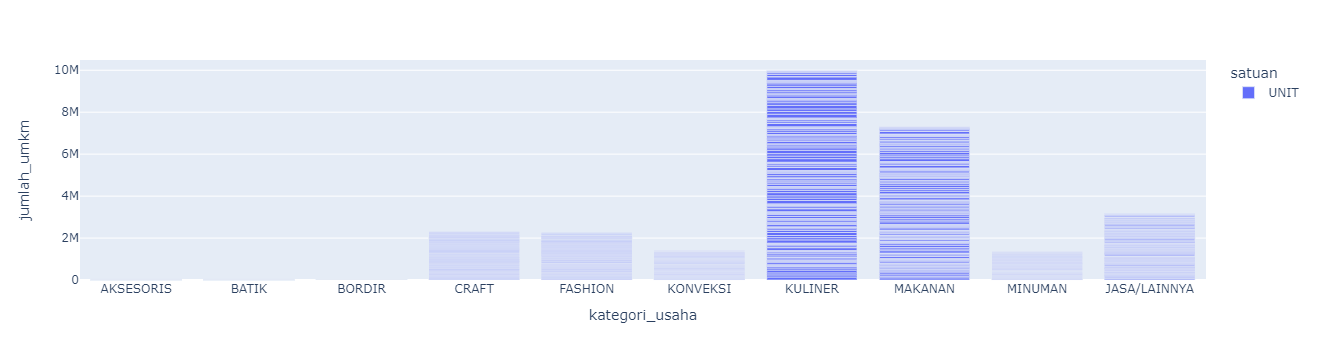

In [21]:
bivariate_visualization_bar(
    data=data,
    x=data['kategori_usaha'],
    y=data['jumlah_umkm'],
    color=data['satuan']
)

> Kategori Usaha yang memiliki **Jumlah UMKM** terbanyak dalam setiap Satuan Unit adalah Usaha **Kuliner** dan **Makanan**.

### **Kategori Usaha manakah yang memiliki nilai Jumlah UMKM terbanyak?**

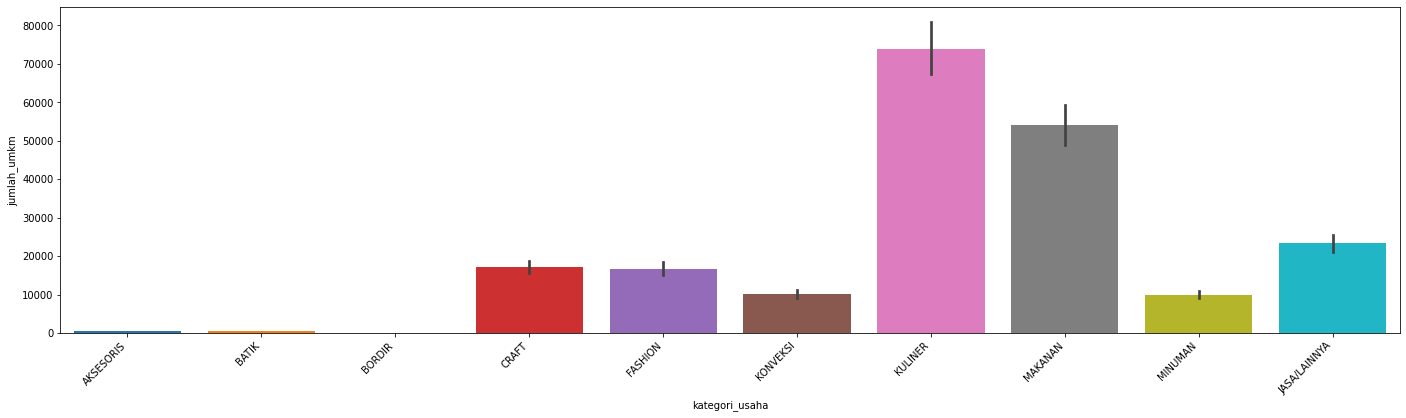

In [22]:
plt.figure(figsize=(24, 6))

viz = sns.barplot(
    x='kategori_usaha', 
    y='jumlah_umkm', 
    data=data,  
    saturation=0.90
)

viz.set_xticklabels(
    viz.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

> Kategori Usaha yang memiliki **Jumlah UMKM** terbanyak adalah Usaha **Kuliner** dan **Makanan**.

### **Nama Kabupaten dan Kota manakah yang memiliki nilai Jumlah UMKM terbanyak?**

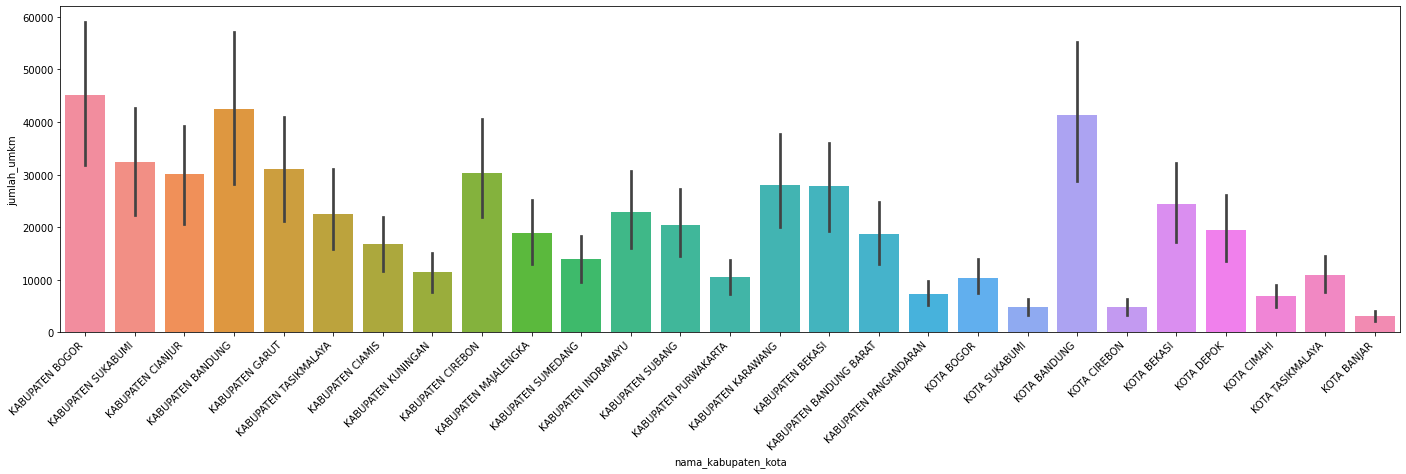

In [23]:
plt.figure(figsize=(24, 6))

viz = sns.barplot(
    x='nama_kabupaten_kota', 
    y='jumlah_umkm', 
    data=data,  
    saturation=0.90
)

viz.set_xticklabels(
    viz.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

> Nama Kabupaten dan Kota yang memiliki **Jumlah UMKM** terbanyak adalah **Kota Bandung**, **Kabupaten Bogor**, dan **Kabupaten Bandung**.

### **Berapa persen kah nilai kemunculan Kategori Usaha dalam data?**

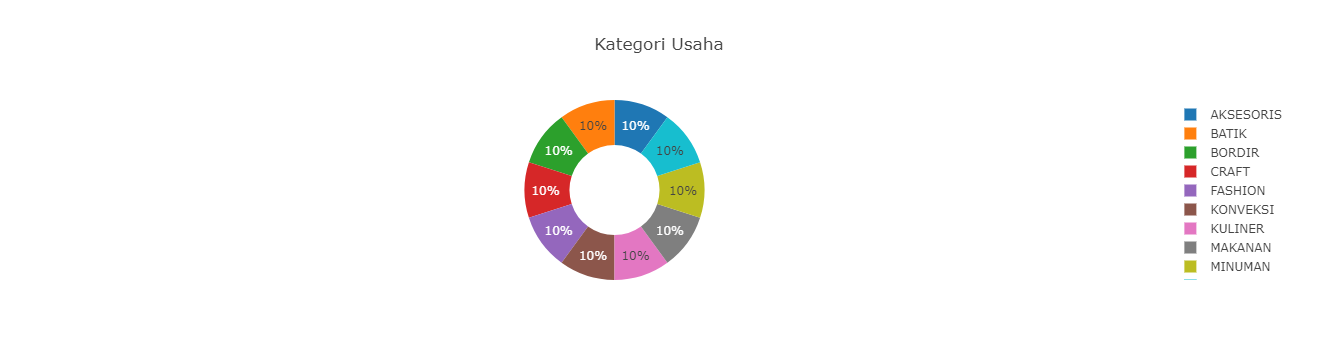

In [24]:
bivariate_visualization_pie(
    data=data,
    names='kategori_usaha',
    title='Kategori Usaha',
    hole=0.5
)

> Frekuensi kemunculan **Kategori Usaha** bernilai sama, yaitu 10%.

### **Berapa persen kah nilai kemunculan Nama Kabupaten dan Kota dalam data?**

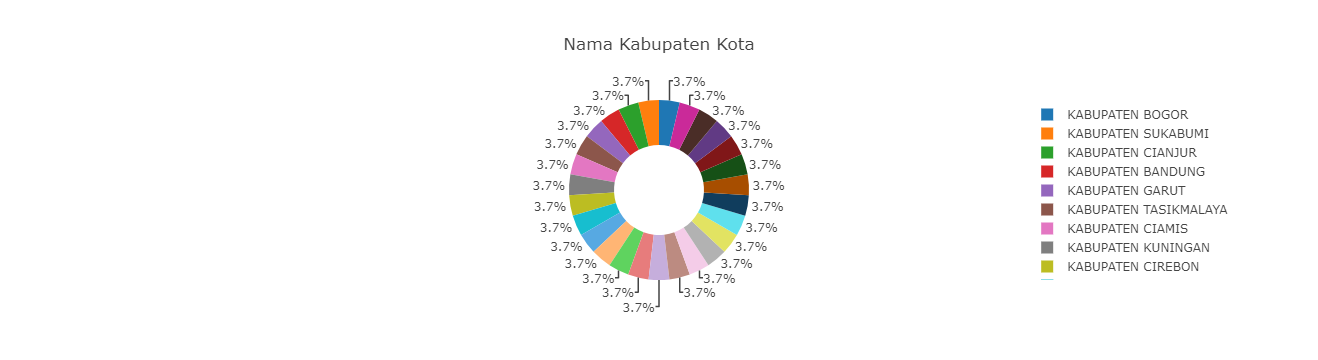

In [25]:
bivariate_visualization_pie(
    data=data,
    names='nama_kabupaten_kota',
    title='Nama Kabupaten Kota',
    hole=0.5
)

> Frekuensi kemunculan **nama kabupaten dan Kota** bernilai sama, yaitu 3.7%.

### **Berapa persen kah nilai kemunculan Nama Provinsi dalam data?**

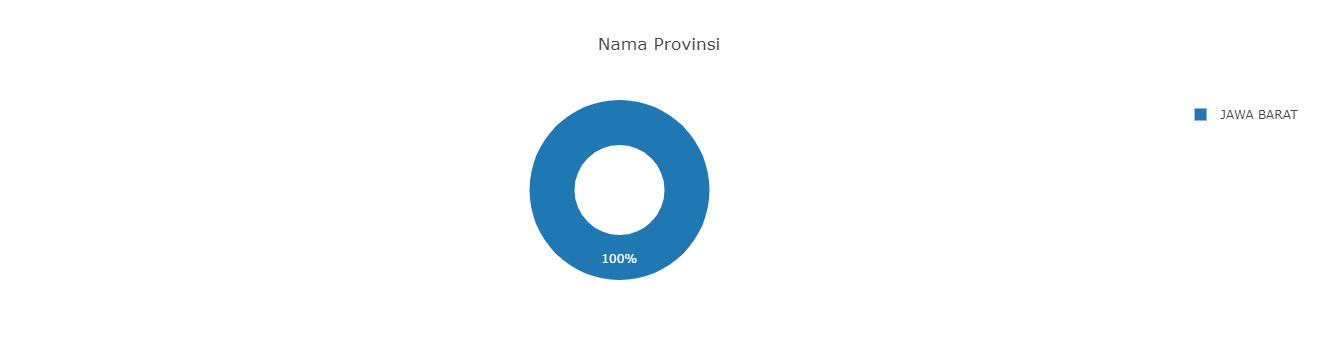

In [26]:
bivariate_visualization_pie(
    data=data,
    names='nama_provinsi',
    title='Nama Provinsi',
    hole=0.5
)

> Frekuensi kemunculan **Nama Provinsi** semua **Jawa Barat** 100%.

### **Berapa persen kah nilai kemunculan Satuan Unit dalam data?**

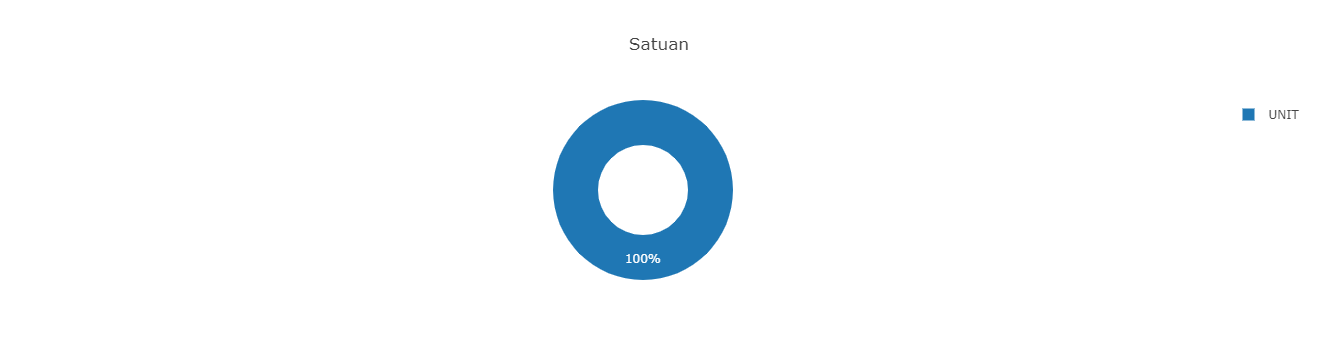

In [27]:
bivariate_visualization_pie(
    data=data,
    names='satuan',
    title='Satuan',
    hole=0.5
)

> Frekuensi kemunculan **Satuan Unit** semuanya sama 100%.

### **Kategori Usaha apa yang memiliki nilai terbanyak dari Jumlah UMKM?**

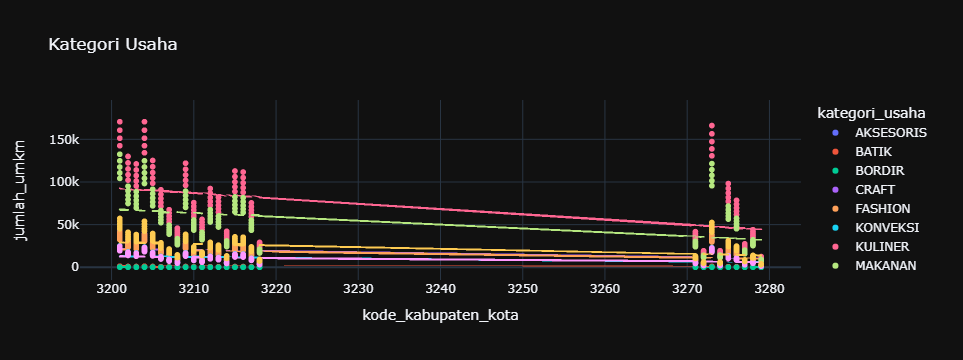

In [28]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='kategori_usaha',
    title='Kategori Usaha'
)

> Kategori Usaha yang memiliki Jumlah UMKM terbanyak ialah **Kuliner** dan **Makanan**.

### **Nama Kabupaten dan Kota manakah yang memiliki Jumlah UMKM terbanyak?**

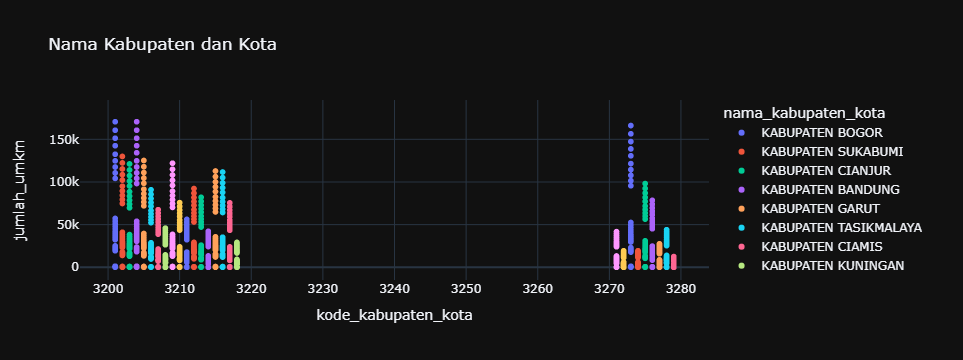

In [29]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='nama_kabupaten_kota',
    title='Nama Kabupaten dan Kota'
)

> Nama Kabupaten dan Kota yang memiliki Jumlah UMKM terbanyak adalah **Kota Bandung**, **Kabupaten Bogor**, dan **Kabupaten Bandung**.

### **Provinsi Manakah yang memiliki frekuensi kemunculan yang banyak?**

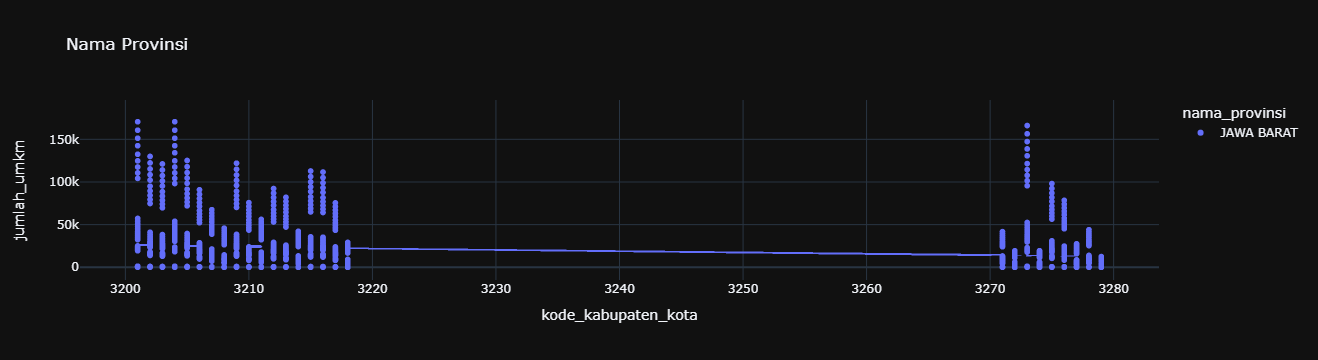

In [30]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='nama_provinsi',
    title='Nama Provinsi'
)

> Provinsi yang memiliki frekuensi kemunculan yang banyak adalah **Jawa Barat**.

### **Satuan apakah yang memiliki frekuensi kemunculan yang banyak?**

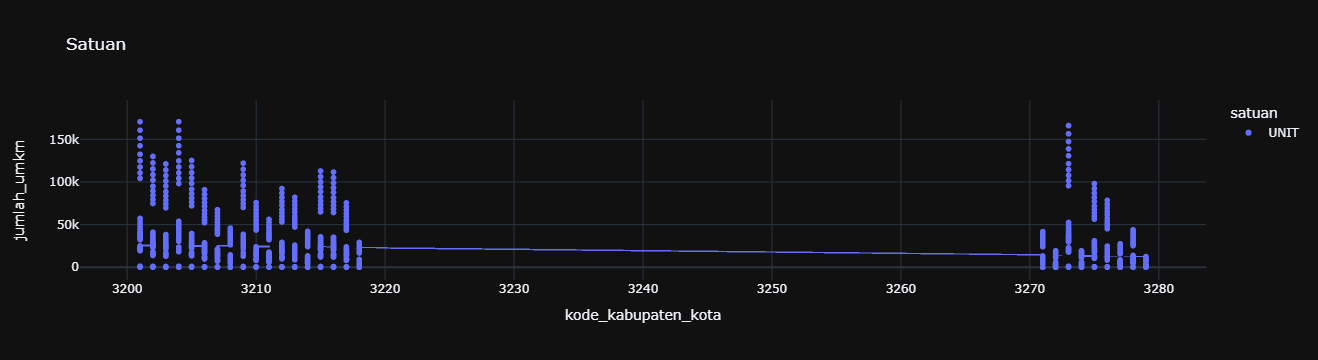

In [31]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='satuan',
    title='Satuan'
)

> Satuan yang memiliki frekuensi kemunculan yang banyak adalah **UNIT**.

### **Di tahun berapakah Nama Kabupaten dan Kota memiliki Jumlah UMKM terbanyak?**

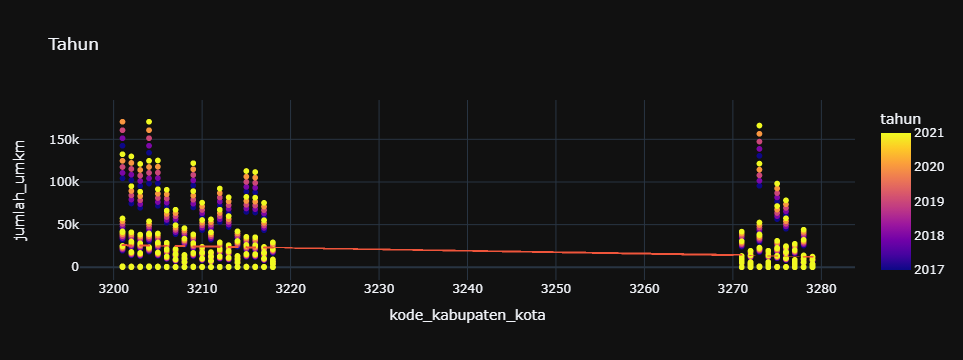

In [32]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='tahun',
    title='Tahun'
)

> Dominan Nama Kabupaten dan Kota yang memiliki **Jumlah UMKM** terbanyak adalah di **Tahun 2021**.

# **Multivariate Analysis**

### **Kategori Usaha dengan visualisasi Multivariate**

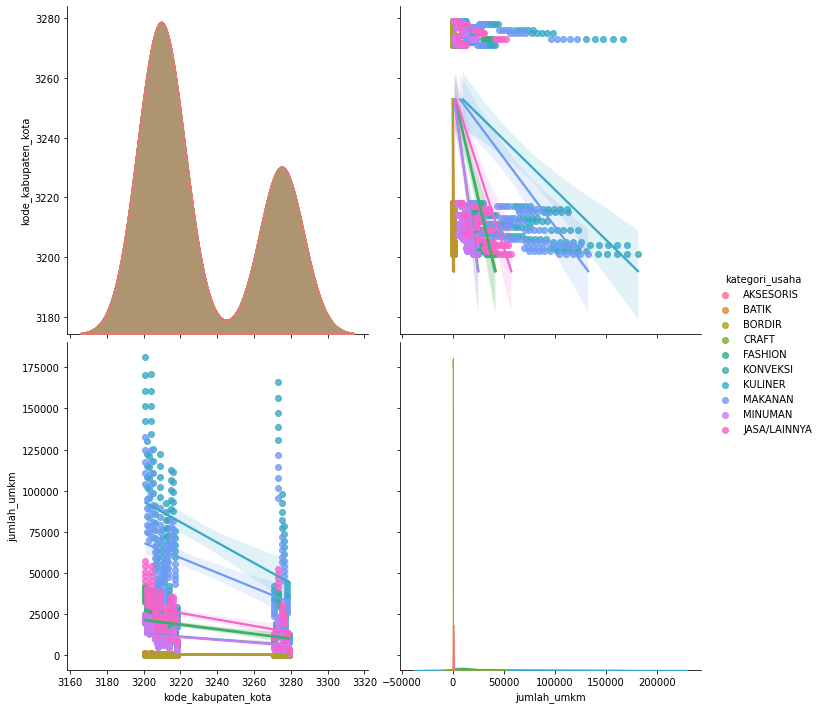

In [33]:
sns.pairplot(
    data=data, 
    vars=['kode_kabupaten_kota', 'jumlah_umkm'], 
    hue='kategori_usaha', 
    kind='reg', 
    diag_kind='kde', 
    size=5, 
    palette='husl'
)

plt.show()

### **Pairplot Overall Data**

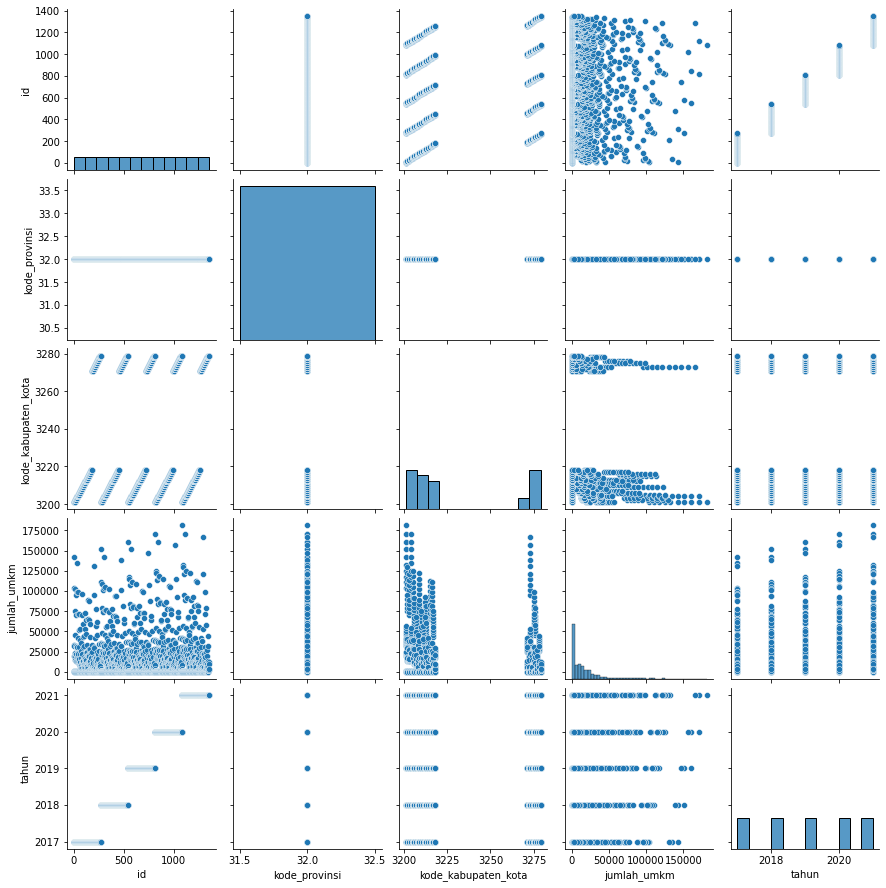

In [34]:
sns.pairplot(data)

# **Kesimpulan:**

* Data memiliki **1350 baris** dan **9 kolom**.
* Data tidak memiliki nilai kosong atau **NaN**.
* Data memiliki **4 tipe object data** dan **5 tipe numeric data**.

* Data Numeric diatas memiliki 2 data yang **Skewed/Miring** yaitu **jumlah_umkm dan kode_kabupaten_kota** dan 3 data berbentuk **Normal Distribution** yaitu **kode_provinsi, id, dan tahun**.

* Data bertipe **object** memiliki frekuensi kemunculan yang sama

Data diatas menunjukan bahwa Kabupaten Bogor memiliki Jumlah UMKM terbanyak di Kategori Usaha Kuliner yaitu 181.187 ribu unit usaha, dan disusul dengan Kabupaten Bandung dengan 170.669 ribu unit usaha di tahun 2021.

# **Encoding**

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in data.columns:
    if data[i].dtype == 'object':
        label_encoder.fit_transform(list(data[i].values))
        data[i] = label_encoder.transform(data[i].values)
        
        for j in data.columns:
            if data[j].dtype == 'int':
                data[j] = data[j].astype('float64')

In [36]:
data, data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1350 non-null   int64  
 1   kode_provinsi        1350 non-null   int64  
 2   nama_provinsi        1350 non-null   float64
 3   kode_kabupaten_kota  1350 non-null   int64  
 4   nama_kabupaten_kota  1350 non-null   float64
 5   kategori_usaha       1350 non-null   float64
 6   jumlah_umkm          1350 non-null   int64  
 7   satuan               1350 non-null   float64
 8   tahun                1350 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 95.0 KB


(        id  kode_provinsi  nama_provinsi  kode_kabupaten_kota  nama_kabupaten_kota  \
 0        1             32            0.0                 3201                  3.0   
 1        2             32            0.0                 3201                  3.0   
 2        3             32            0.0                 3201                  3.0   
 3        4             32            0.0                 3201                  3.0   
 4        5             32            0.0                 3201                  3.0   
 ...    ...            ...            ...                  ...                  ...   
 1345  1346             32            0.0                 3279                 19.0   
 1346  1347             32            0.0                 3279                 19.0   
 1347  1348             32            0.0                 3279                 19.0   
 1348  1349             32            0.0                 3279                 19.0   
 1349  1350             32            0.0  

# **Splitting Data**

In [37]:
X = data.drop(columns=['jumlah_umkm', 'id'])
y = data['jumlah_umkm']

X.shape, y.shape

((1350, 7), (1350,))

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((945, 7), (405, 7), (945,), (405,))

In [39]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import  RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

# **Model Building**

### **RandomForestRegressor**

In [40]:
pipe_random_forest_regressor = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', RandomForestRegressor())
])

pipe_random_forest_regressor.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model', RandomForestRegressor())])

In [41]:
pred_test_rfr = pipe_random_forest_regressor.predict(X_test)

print('Testing R2 Score: ', r2_score(y_test, pred_test_rfr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_rfr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_test_rfr))
print('Testing MSE: ', mean_squared_error(y_test, pred_test_rfr))

Testing R2 Score:  99.07983915777254
Testing RMSE:  2623.780903138131
Testing MAE:  1274.1816543209875
Testing MSE:  6884226.227672347


### **DecisionForestRegressor**

In [42]:
pipe_decision_forest_regressor = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', DecisionTreeRegressor())
])

pipe_decision_forest_regressor.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model', DecisionTreeRegressor())])

In [43]:
pred_test_dfr = pipe_decision_forest_regressor.predict(X_test)

print('Testing R2 Score: ', r2_score(y_test, pred_test_dfr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_dfr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_test_dfr))
print('Testing MSE: ', mean_squared_error(y_test, pred_test_dfr))

Testing R2 Score:  99.11284182203842
Testing RMSE:  2576.2987514630604
Testing MAE:  1266.6888888888889
Testing MSE:  6637315.256790124


### **LinearRegression**

In [44]:
pipe_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', LinearRegression())
])

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model', LinearRegression())])

In [45]:
pred_test_lr = pipe_lr.predict(X_test)

print('Testing R2 Score: ', r2_score(y_test, pred_test_lr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_lr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_test_lr))
print('Testing MSE: ', mean_squared_error(y_test, pred_test_lr))

Testing R2 Score:  26.160806581389608
Testing RMSE:  23503.858556281226
Testing MAE:  15834.675337803374
Testing MSE:  552431367.0336741


### **KNeighborsRegressor**

In [46]:
pipe_knr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', KNeighborsRegressor())
])

pipe_knr.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model', KNeighborsRegressor())])

In [47]:
pred_test_knr = pipe_knr.predict(X_test)

print('Testing R2 Score: ', r2_score(y_test, pred_test_knr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_knr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_test_knr))
print('Testing MSE: ', mean_squared_error(y_test, pred_test_knr))

Testing R2 Score:  60.88590428622387
Testing RMSE:  17106.546410636463
Testing MAE:  11075.408888888887
Testing MSE:  292633930.0992593


### **Kesimpulan**

Dikarenakan Data yang kurang memadai, accuracy model juga tidak terlalu baik, dan dikarenakan Model DecisionForestRegressor memiliki Performa yang baik dibandingkan model yang lain, jadi saya akan memakai model DecisionForestRegressor untuk melakukan prediksi.

# **Prediction**

In [48]:
new_data = data.loc[data.tahun == 2021] # buat data baru

new_data.tahun = 2022 # ubah ke tahun 2022

del new_data['jumlah_umkm'] # hapus kolom jumlah_umkm
del new_data['id'] # haps kolom id

jumlah_umkm_2022 = pipe_decision_forest_regressor.predict(new_data) # predict 

new_data['jumlah_umkm'] = jumlah_umkm_2022 # buat kolom baru

new_data['nama_kabupaten_kota'] = data_copy['nama_kabupaten_kota'] # ubah kolom

new_data['kategori_usaha'] = data_copy['kategori_usaha'] # ubah kolom

new_data['satuan'] = data_copy['satuan'] # ubah kolom

new_data['nama_provinsi'] = data_copy['nama_provinsi'] # ubah kolom

new_data # cek data

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_usaha,satuan,tahun,jumlah_umkm
1080,32,JAWA BARAT,3201,KABUPATEN BOGOR,AKSESORIS,UNIT,2022,1179.0
1081,32,JAWA BARAT,3201,KABUPATEN BOGOR,BATIK,UNIT,2022,1110.0
1082,32,JAWA BARAT,3201,KABUPATEN BOGOR,BORDIR,UNIT,2022,168.0
1083,32,JAWA BARAT,3201,KABUPATEN BOGOR,CRAFT,UNIT,2022,39654.0
1084,32,JAWA BARAT,3201,KABUPATEN BOGOR,FASHION,UNIT,2022,41087.0
...,...,...,...,...,...,...,...,...
1345,32,JAWA BARAT,3279,KOTA BANJAR,KONVEKSI,UNIT,2022,1732.0
1346,32,JAWA BARAT,3279,KOTA BANJAR,KULINER,UNIT,2022,12510.0
1347,32,JAWA BARAT,3279,KOTA BANJAR,MAKANAN,UNIT,2022,9150.0
1348,32,JAWA BARAT,3279,KOTA BANJAR,MINUMAN,UNIT,2022,1698.0


### **Nama Kabupaten dan Kota manakah yang akan memiliki Jumlah UMKM terbanyak di tahun 2022?**

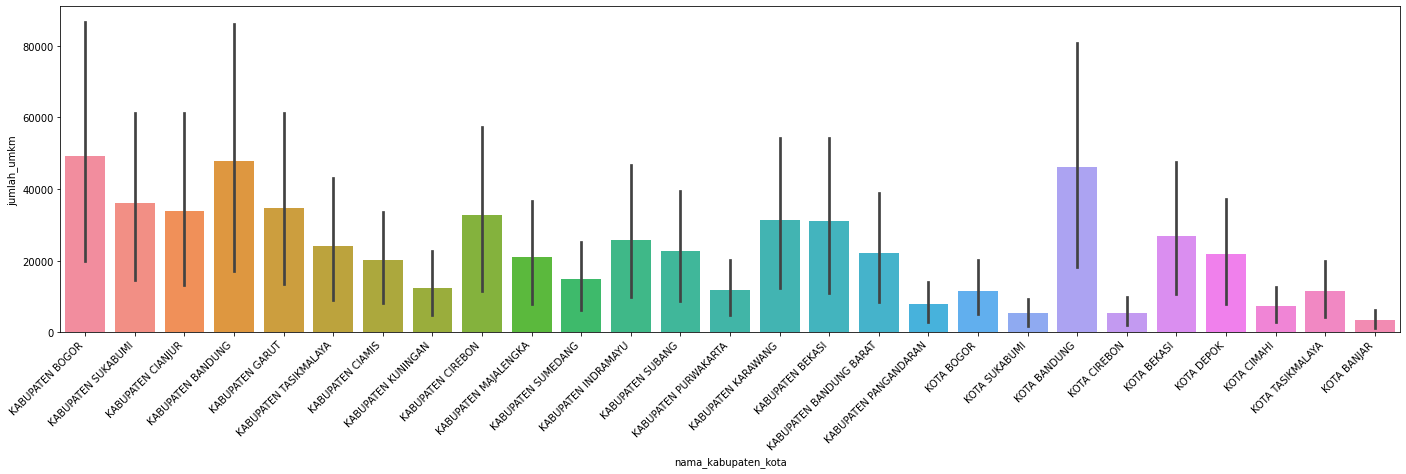

In [49]:
plt.figure(figsize=(24, 6))

viz = sns.barplot(
    x='nama_kabupaten_kota', 
    y='jumlah_umkm', 
    data=new_data,  
    saturation=0.90
)

viz.set_xticklabels(
    viz.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

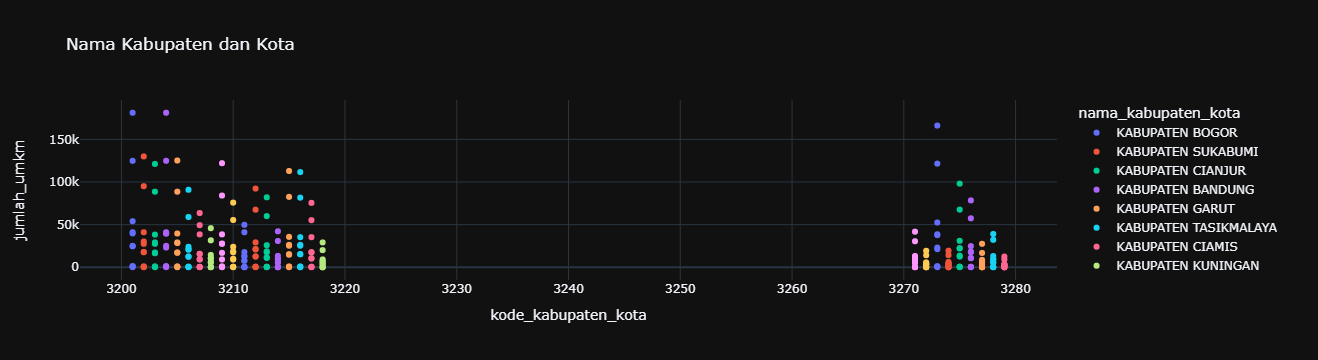

In [50]:
bivariate_visualization_scatter(
    data=new_data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='nama_kabupaten_kota',
    title='Nama Kabupaten dan Kota'
)

> Nama Kabupaten dan Kota yang memiliki Jumlah UMKM terbanyak di tahun 2022 adalah **Kota Bandung**, **Kabupaten Bogor**, dan **Kabupaten Bandung**.

### **Kategori Usaha manakah yang memiliki Jumlah UMKM terbanyak di tahun 2022?**

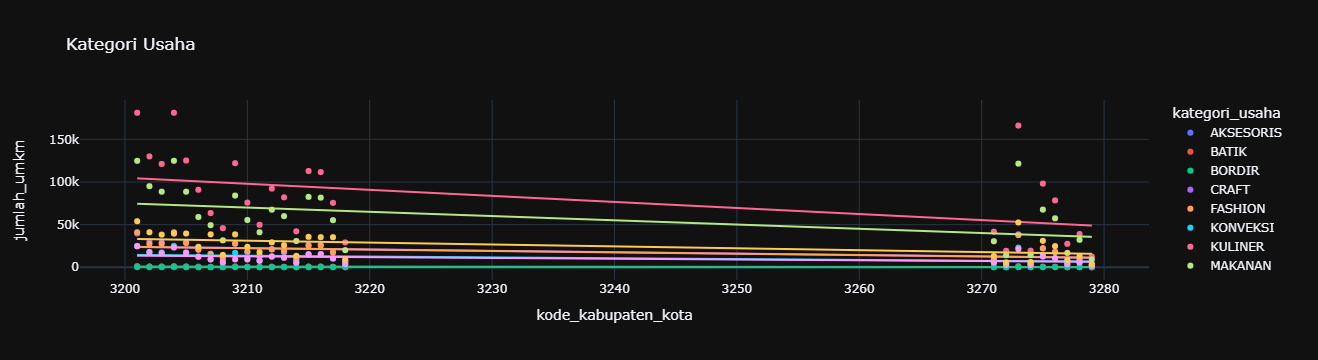

In [51]:
bivariate_visualization_scatter(
    data=new_data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='kategori_usaha',
    title='Kategori Usaha'
)

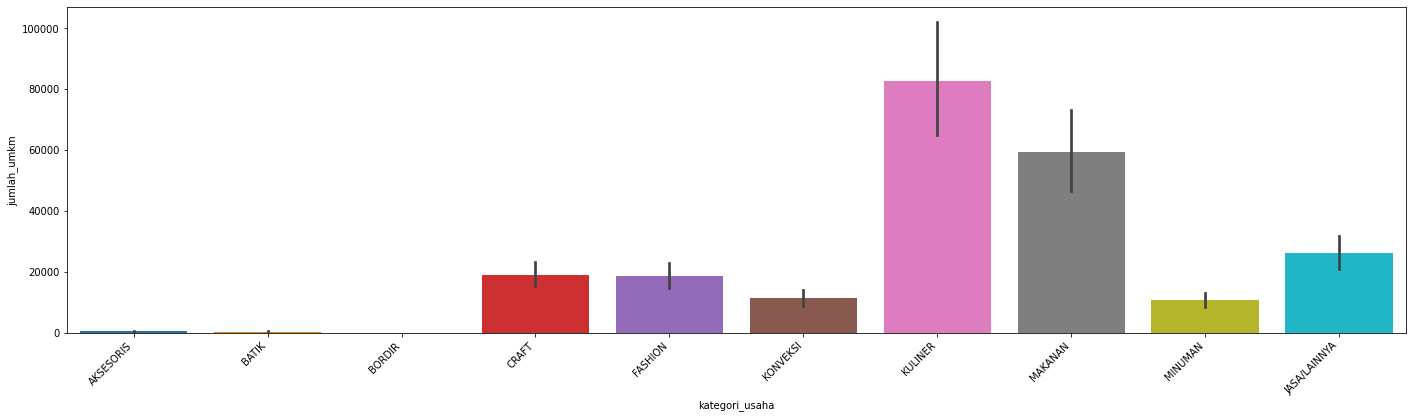

In [52]:
plt.figure(figsize=(24, 6))

viz = sns.barplot(
    x='kategori_usaha', 
    y='jumlah_umkm', 
    data=new_data,  
    saturation=0.90
)

viz.set_xticklabels(
    viz.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

> Kategori Usaha yang diprediksi akan memiliki **Jumlah UMKM** terbanyak adalah Kategiru Usaha **Kuliner** dan **Makanan**.

### **Kesimpulan:**

Hasil prediksi di Tahun 2022, diperkirakan Kategori Usaha Makanan dan Kuliner dan lainnya, menurun, ini bisa disebabkan oleh adanya PSBB dan PPKM dibeberapa tempat di Jawa Barat yang saat ini membuat usaha mikro dan kecil terdesak. Banyak diantaranya yang terpaksa harus menutup usaha, karena terpaksa memakai modal usaha untuk konsumsi sehari-hari, menjadikan Usaha" tersebut mengalami penurunan.

Tetapi, ada satu cara yang bisa dilakukan, dimana pandemi tidak menjadi halangan dan usaha justru berkembang sangat pesat. Caranya adalah berjualan secara online. Jika produk dapat memungkinkan untuk dijual secara online, ini adalah kesempatan besar. Hal ini dimungkinkan karena meningkatnya jumlah pengguna intenet di Indonesia secara pesat setiap tahun. Kini internet tidak hanya dinikmati oleh orang-orang kota, tapi sudah menjangkau ke desa-desa.

Tentu akan sangat disayangkan, jika internet hanya digunakan untuk sosial media seperti Facebook dan Instagram atau hanya dipakai untuk bermain game saja. Karena dengan berjualan produk secara online, UMKM dapat memasarkan produk dan jasanya lebih luas, lebih mudah, dan lebih murah.

Sedangkan Usaha Jasa dan Fashion ini meningkat, ini dikarenakan berjualan baju, celana dan semacamnya dapat dijual secara online, dan Jasa-jasa layanan pengiriman barang seperti JNE, JNT dll, yang dibutuhkan untuk pengiriman barang ataupun makanan.

In [53]:
data_umkm_kategori_usaha_tahun_2022 = pd.concat([data_copy, new_data], ignore_index=True) # concat data

del data_umkm_kategori_usaha_tahun_2022['id'] # hapus kolom id

data_umkm_kategori_usaha_tahun_2022 # review data

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_usaha,jumlah_umkm,satuan,tahun
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,AKSESORIS,927.0,UNIT,2017
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,BATIK,927.0,UNIT,2017
2,32,JAWA BARAT,3201,KABUPATEN BOGOR,BORDIR,132.0,UNIT,2017
3,32,JAWA BARAT,3201,KABUPATEN BOGOR,CRAFT,33111.0,UNIT,2017
4,32,JAWA BARAT,3201,KABUPATEN BOGOR,FASHION,32316.0,UNIT,2017
...,...,...,...,...,...,...,...,...
1615,32,JAWA BARAT,3279,KOTA BANJAR,KONVEKSI,1732.0,UNIT,2022
1616,32,JAWA BARAT,3279,KOTA BANJAR,KULINER,12510.0,UNIT,2022
1617,32,JAWA BARAT,3279,KOTA BANJAR,MAKANAN,9150.0,UNIT,2022
1618,32,JAWA BARAT,3279,KOTA BANJAR,MINUMAN,1698.0,UNIT,2022


In [55]:
data_umkm_kategori_usaha_tahun_2022.to_csv('data_umkm_kategori_usaha_tahun_2022.csv', index=False) # export data